In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Задание цветов вручную
#custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']

In [ ]:
df = pd.read_csv(r'/content/24bias_all_corr_outliner.csv', index_col=0)

In [ ]:
df
df.info()
df.columns

area/volume  h_range_max_koe      Tc  temperature_k  sat_em_g    coer_oe  \
0       0.405405             50.0   793.0            5.0   51.8758  27800.000   
1       0.428571             50.0   843.0            5.0   59.7340   7800.000   
2       0.176471             10.0   640.0          300.0    2.2900     24.800   
3       0.272727             10.0   640.0          300.0    2.4300     90.200   
4       0.250000             10.0   640.0          300.0   16.1500     40.070   
..           ...              ...     ...            ...       ...        ...   
974     0.158061             70.0  1103.0            2.0   12.2018   1923.000   
975     0.235479             70.0  1103.0            2.0   12.2018    450.000   
976     0.060000             30.0   720.0           10.0    0.8450    619.815   
977     0.060000             30.0   720.0           30.0    0.7830    289.735   
978     0.060000             30.0   597.0          200.0    0.6700    358.220   

     mr (emu/g)  exc_bias_oe  exc_dir  ver_shift_emu_g  ...  core_sum_vec  \
0       29.1666     1132.000      0.0          0.00000  ...      300.0000   
1       38.8100      406.000      0.0          0.00000  ...      750.0000   
2        0.0078       51.340      1.0          0.00000  ...      621.4286   
3        0.0218      108.180      1.0          0.00000  ...      621.4286   
4        0.3498        8.920      1.0          0.00000  ...      621.4286   
..          ...          ...      ...              ...  ...           ...   
974      2.1873     1180.000      0.0          2.10662  ...      520.0000   
975      0.1190      126.000      0.0          0.03832  ...      520.0000   
976      0.1070      432.315      0.0          0.08100  ...      742.8571   
977      0.6500      289.735      0.0          0.65000  ...      742.8571   
978      0.6390      358.220      0.0          0.63900  ...      742.8571   

     core_sum_work_function  shell_sum_vec  shell_sum_work_function  \
0                    0.0000          700.0                 205.7143   
1                  250.0000          700.0                 205.7143   
2                  163.5714            0.0                   0.0000   
3                  163.5714            0.0                   0.0000   
4                  163.5714            0.0                   0.0000   
..                      ...            ...                      ...   
974                 94.0000            0.0                   0.0000   
975                 94.0000            0.0                   0.0000   
976                216.4286          800.0                 257.5000   
977                216.4286          800.0                 257.5000   
978                216.4286          800.0                 257.5000   

     core_pauling_electronegativity_difference  core_vec_difference  \
0                                     7.071068             7.071068   
1                                     2.932331             2.000000   
2                                     3.105571             1.594171   
3                                     3.105571             1.594171   
4                                     3.105571             1.594171   
..                                         ...                  ...   
974                                   3.403618             2.686808   
975                                   3.403618             2.686808   
976                                   2.763638             2.259104   
977                                   2.763638             2.259104   
978                                   2.763638             2.259104   

     core_work_function_difference  \
0                          0.00000   
1                         10.00000   
2                         13.17672   
3                         13.17672   
4                         13.17672   
..                             ...   
974                       19.49359   
975                       19.49359   
976                       11.54899   
977                  

In [ ]:
# Сохраняем удаленные столбцы в отдельный DataFrame
removed_columns_df = df[['core', 'shell', 'formula']]

# Удаляем ненужные колонки перед масштабированием
df = df.drop(columns=['core', 'shell', 'formula'])
                  #, 'volume', 'area', 'x', 'y', 'z', 'Unnamed: 0',
                  # 'id', 'core', 'shell', 'formula'] #, 'volume', 'area', 'x', 'y', 'z',
                  #'id',  'Unnamed: 0'

In [ ]:
id = df['Unnamed: 0']

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 978
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area/volume                                 958 non-null    float64
 1   h_range_max_koe                             958 non-null    float64
 2   Tc                                          958 non-null    float64
 3   temperature_k                               958 non-null    float64
 4   sat_em_g                                    958 non-null    float64
 5   coer_oe                                     958 non-null    float64
 6   mr (emu/g)                                  958 non-null    float64
 7   exc_bias_oe                                 958 non-null    float64
 8   exc_dir                                     958 non-null    float64
 9   ver_shift_emu_g                             958 non-null    float64
 10  ver_s_dir          

# Outliners

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Преобразование датасета
scaled_df = scaler.fit_transform(df)

# Преобразование в DataFrame
df_scaled = pd.DataFrame(scaled_df, columns=df.columns, index=df.index)
print("Data scaled")
# Вывод преобразованного датасета
print(df, df_scaled)

Data scaled
     area/volume  h_range_max_koe      Tc  temperature_k  sat_em_g    coer_oe  \
0       0.405405             50.0   793.0            5.0   51.8758  27800.000   
1       0.428571             50.0   843.0            5.0   59.7340   7800.000   
2       0.176471             10.0   640.0          300.0    2.2900     24.800   
3       0.272727             10.0   640.0          300.0    2.4300     90.200   
4       0.250000             10.0   640.0          300.0   16.1500     40.070   
..           ...              ...     ...            ...       ...        ...   
974     0.158061             70.0  1103.0            2.0   12.2018   1923.000   
975     0.235479             70.0  1103.0            2.0   12.2018    450.000   
976     0.060000             30.0   720.0           10.0    0.8450    619.815   
977     0.060000             30.0   720.0           30.0    0.7830    289.735   
978     0.060000             30.0   597.0          200.0    0.6700    358.220   

     mr (emu/g)

In [ ]:
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
        data (array-like): Input data.
        threshold (float): Multiplier for the IQR to determine the outlier cutoff.

    Returns:
        outliers (array-like): Array containing the indices of outlier data points.
    """
    quartile_1, quartile_3 = np.percentile(data, [20, 80])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (threshold * iqr)
    upper_bound = quartile_3 + (threshold * iqr)
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

# Пример использования:
outliers = detect_outliers_iqr(df['exc_bias_oe'])
print("Индексы выбросов:", outliers)
print("Значения выбросов:", df['exc_bias_oe'].iloc[outliers].values)

Индексы выбросов: []
Значения выбросов: []


In [ ]:
import plotly.graph_objs as go

# Detect outliers
outliers = detect_outliers_iqr(df['exc_bias_oe'])

# Преобразование позиции в фактические индексы DataFrame
outlier_indices = df.index[outliers]

# Получение значений выбросов
outlier_values = df.loc[outlier_indices, 'exc_bias_oe']

# Scatter plot
fig = go.Figure()

# Plot all data points
fig.add_trace(go.Scatter(x=np.arange(len(df['exc_bias_oe'])), y=df['exc_bias_oe'], mode='markers', name='Data Points', marker=dict(color='blue')))

# Highlight outliers
fig.add_trace(go.Scatter(x=outliers, y=outlier_values, mode='markers', marker=dict(color='red'), name='Outliers'))

# Add layout
fig.update_layout(title='Outlier Detection Using IQR Method',
                  xaxis_title='Index',
                  yaxis_title='Value')

# Show plot
fig.show()

In [ ]:
# Удаление выбросов
out_data = df_scaled.drop(index=df_scaled.index[outliers])
print("Data without outliers:\n", out_data.head())

Data without outliers:
    area/volume  h_range_max_koe        Tc  temperature_k  sat_em_g   coer_oe  \
0     0.201505         0.499499  0.467811       0.005279  0.000487  0.470034   
1     0.213105         0.499499  0.498467       0.005279  0.000560  0.131873   
2     0.086866         0.099099  0.374004       0.491917  0.000021  0.000409   
3     0.135066         0.099099  0.374004       0.491917  0.000023  0.001515   
4     0.123686         0.099099  0.374004       0.491917  0.000152  0.000667   

   mr (emu/g)  exc_bias_oe  exc_dir  ver_shift_emu_g  ...  core_sum_vec  \
0    0.117626     0.902930      0.0              0.0  ...      0.300000   
1    0.156517     0.323838      0.0              0.0  ...      0.750000   
2    0.000031     0.040945      1.0              0.0  ...      0.621429   
3    0.000088     0.086283      1.0              0.0  ...      0.621429   
4    0.001411     0.007109      1.0              0.0  ...      0.621429   

   core_sum_work_function  shell_sum_vec  sh

In [ ]:
# Обратное масштабирование
unscaled_out_data = scaler.inverse_transform(out_data)
df_unscaled = pd.DataFrame(unscaled_out_data, columns=out_data.columns, index=out_data.index)

# Восстановление удаленных столбцов
# Мы сохраняем изначальный индекс, чтобы можно было добавить удаленные столбцы обратно
df_with_removed_columns = df_unscaled #df_unscaled.join(removed_columns_df.loc[out_data.index])

In [ ]:
# Вывод информации о DataFrame
print("Data after inverse scaling and adding removed columns:")
print(df_with_removed_columns.head())
print(df_with_removed_columns.info())

Data after inverse scaling and adding removed columns:
   area/volume  h_range_max_koe     Tc  temperature_k  sat_em_g   coer_oe  \
0     0.405405             50.0  793.0            5.0   51.8758  27800.00   
1     0.428571             50.0  843.0            5.0   59.7340   7800.00   
2     0.176471             10.0  640.0          300.0    2.2900     24.80   
3     0.272727             10.0  640.0          300.0    2.4300     90.20   
4     0.250000             10.0  640.0          300.0   16.1500     40.07   

   mr (emu/g)  exc_bias_oe  exc_dir  ver_shift_emu_g  ...  core_sum_vec  \
0     29.1666      1132.00      0.0              0.0  ...      300.0000   
1     38.8100       406.00      0.0              0.0  ...      750.0000   
2      0.0078        51.34      1.0              0.0  ...      621.4286   
3      0.0218       108.18      1.0              0.0  ...      621.4286   
4      0.3498         8.92      1.0              0.0  ...      621.4286   

   core_sum_work_function  shel

In [ ]:
df = df_with_removed_columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 0 to 978
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area/volume                                 933 non-null    float64
 1   h_range_max_koe                             933 non-null    float64
 2   Tc                                          933 non-null    float64
 3   temperature_k                               933 non-null    float64
 4   sat_em_g                                    933 non-null    float64
 5   coer_oe                                     933 non-null    float64
 6   mr (emu/g)                                  933 non-null    float64
 7   exc_bias_oe                                 933 non-null    float64
 8   exc_dir                                     933 non-null    float64
 9   ver_shift_emu_g                             933 non-null    float64
 10  ver_s_dir          

In [ ]:
df = df.to_csv('24bias_all_corr_outliner.csv')

# Voilin plots

In [ ]:
df.columns

Index(['area/volume', 'h_range_max_koe', 'Tc', 'temperature_k', 'sat_em_g',
       'coer_oe', 'mr (emu/g)', 'exc_bias_oe', 'exc_dir', 'ver_shift_emu_g',
       'ver_s_dir', 'fc_field_t', 'sphericity', 'max/min', 'core_b',
       'core_alpha', 'core_beta', 'core_gamma', 'shell_b', 'shell_alpha',
       'shell_beta', 'shell_gamma', 'num_of_magn_ions', 'Tn-Tb/Tn', 'Aex',
       'core_c/a', 'core', 'shell', 'formula'],
      dtype='object')

In [ ]:
categorical_columns = ['exc_dir', 'ver_s_dir', 'sphericity'] #'space_group_core', 'shape'
                       #'space_group_shell',

# Преобразование типа данных столбцов в категориальный
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
df['exc_dir'].unique()

array([0., 1.])

In [ ]:
for column in categorical_columns:
    mean_value = df[column].mean()
    df[column] = df[column].apply(lambda x: min(df[column]) if x < mean_value else max(df[column]))

print(df)

      area/volume  h_range_max_koe      Tc  temperature_k  sat_em_g  \
0        0.405405             50.0   793.0            5.0   51.8758   
1        0.428571             50.0   843.0            5.0   59.7340   
2        0.176471             10.0   640.0          300.0    2.2900   
3        0.272727             10.0   640.0          300.0    2.4300   
4        0.250000             10.0   640.0          300.0   16.1500   
...           ...              ...     ...            ...       ...   
1293     0.158061             70.0  1103.0            2.0   12.2018   
1294     0.235479             70.0  1103.0            2.0   12.2018   
1295     0.060000             30.0   720.0           10.0    0.8450   
1296     0.060000             30.0   720.0           30.0    0.7830   
1297     0.060000             30.0   597.0          200.0    0.6700   

        coer_oe  mr (emu/g)  exc_bias_oe  exc_dir  ver_shift_emu_g  ...  \
0     27800.000     29.1666     1132.000      0.0          0.00000  ... 

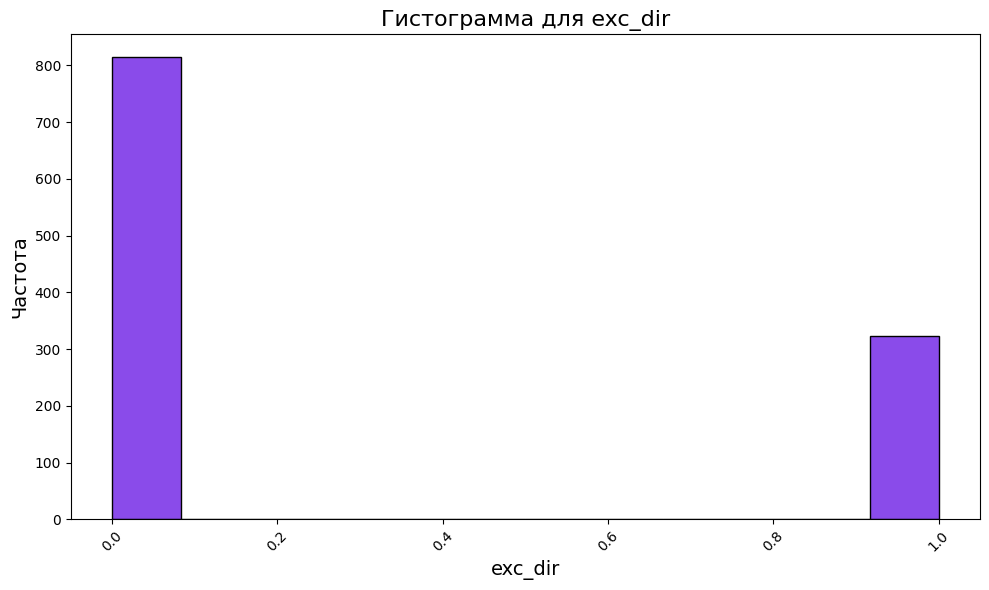

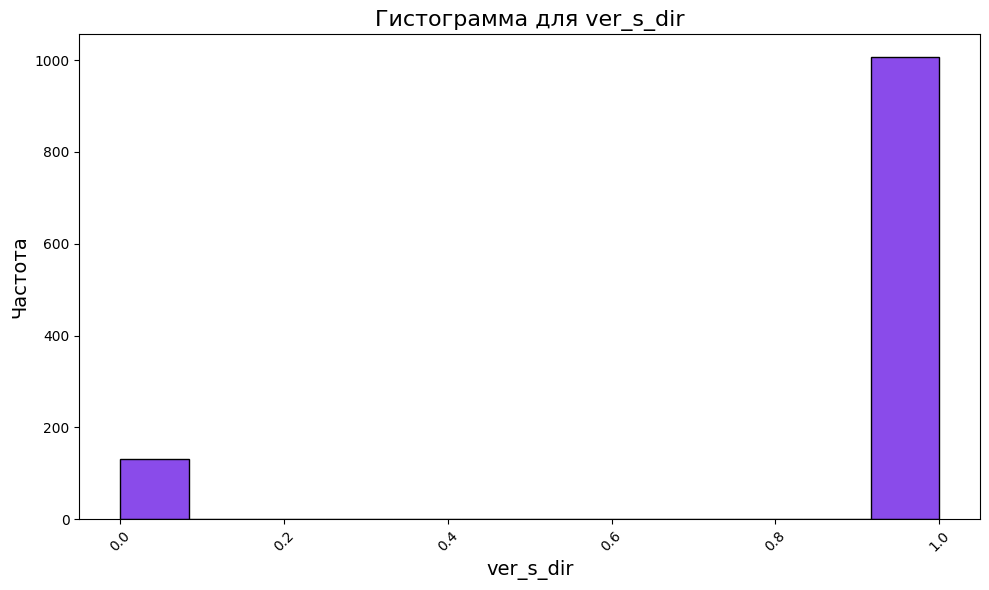

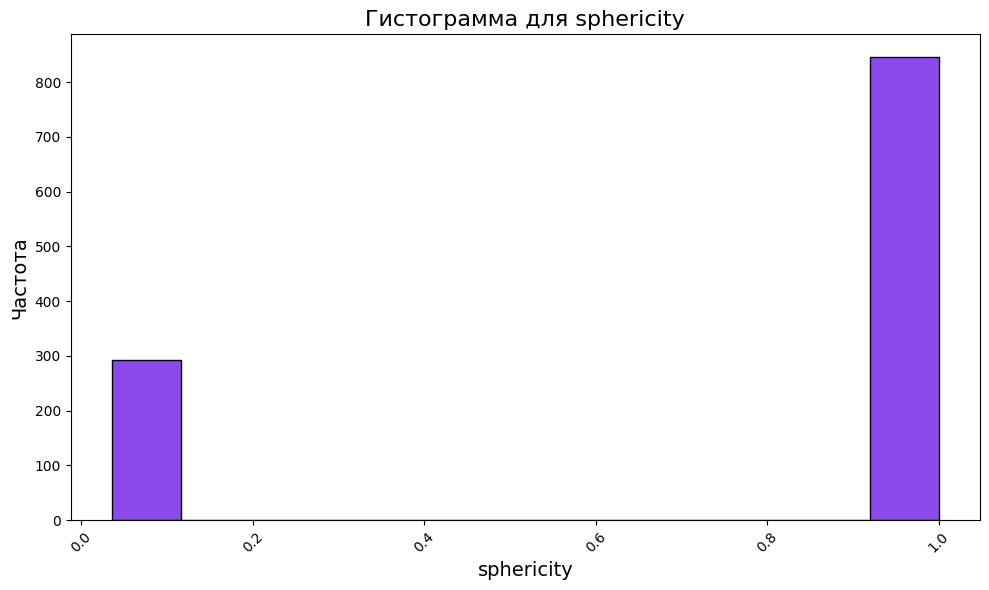

In [ ]:
# Создание графиков гистограмм для каждого категориального столбца
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], color='#630ee3')  # Используем заданный цвет
    plt.title(f'Гистограмма для {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
df = df.drop(columns=categorical_columns)

In [ ]:
columns_of_interest = df.columns

num_columns = len(columns_of_interest)
num_rows = num_columns // 5 + (num_columns % 5 > 0)  # Определение количества строк

plt.figure(figsize=(50, 100))

for idx, column in enumerate(columns_of_interest, start=1):
    plt.subplot(num_rows, 5, idx)
    sns.violinplot(x=df[column], color='#66b3ff')
    plt.title(column, fontsize=50)
    plt.tick_params(axis='both', labelsize=40)
    plt.tight_layout()

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 2 to 2121
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area/volume       1910 non-null   float64
 1   Tc                1910 non-null   float64
 2   temperature_k     1910 non-null   float64
 3   h_range_max_koe   1910 non-null   float64
 4   sat_em_g          1910 non-null   float64
 5   coer_oe           1910 non-null   float64
 6   mr (emu/g)        1910 non-null   float64
 7   sphericity        1910 non-null   float64
 8   max/min           1910 non-null   float64
 9   num_of_magn_ions  1908 non-null   float64
 10  core_b            1910 non-null   float64
 11  core_alpha        1910 non-null   float64
 12  core_beta         1910 non-null   float64
 13  core_gamma        1910 non-null   float64
 14  shell_b           1910 non-null   float64
 15  shell_alpha       1910 non-null   float64
 16  shell_beta        1910 non-null   float64
 17  

for i,_ in df.iterrows():
  if df['max/min'][i] == 1:
    df['max/min'][i] = 0
  elif df['max/min'][i] != 1:
    df['max/min'][i] = 1

for i,_ in df.iterrows():
  if df['max/min'][i] == 1:
    df['max/min'][i] = 0
  elif df['max/min'][i] != 1:
    df['max/min'][i] = 1

for i,_ in df.iterrows():
  if df['max/min'][i] == 1:
    df['max/min'][i] = 0
  elif df['max/min'][i] != 1:
    df['max/min'][i] = 1

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Перечень столбцов для преобразования в категориальный тип
categorical_columns = ['max/min', 'exc_dir', 'ver_s_dir', 'sphericity']

# Преобразование указанных столбцов в категориальный тип
df[categorical_columns] = df[categorical_columns].astype('category')

ValueError: num must be an integer with 1 <= num <= 25, not 26

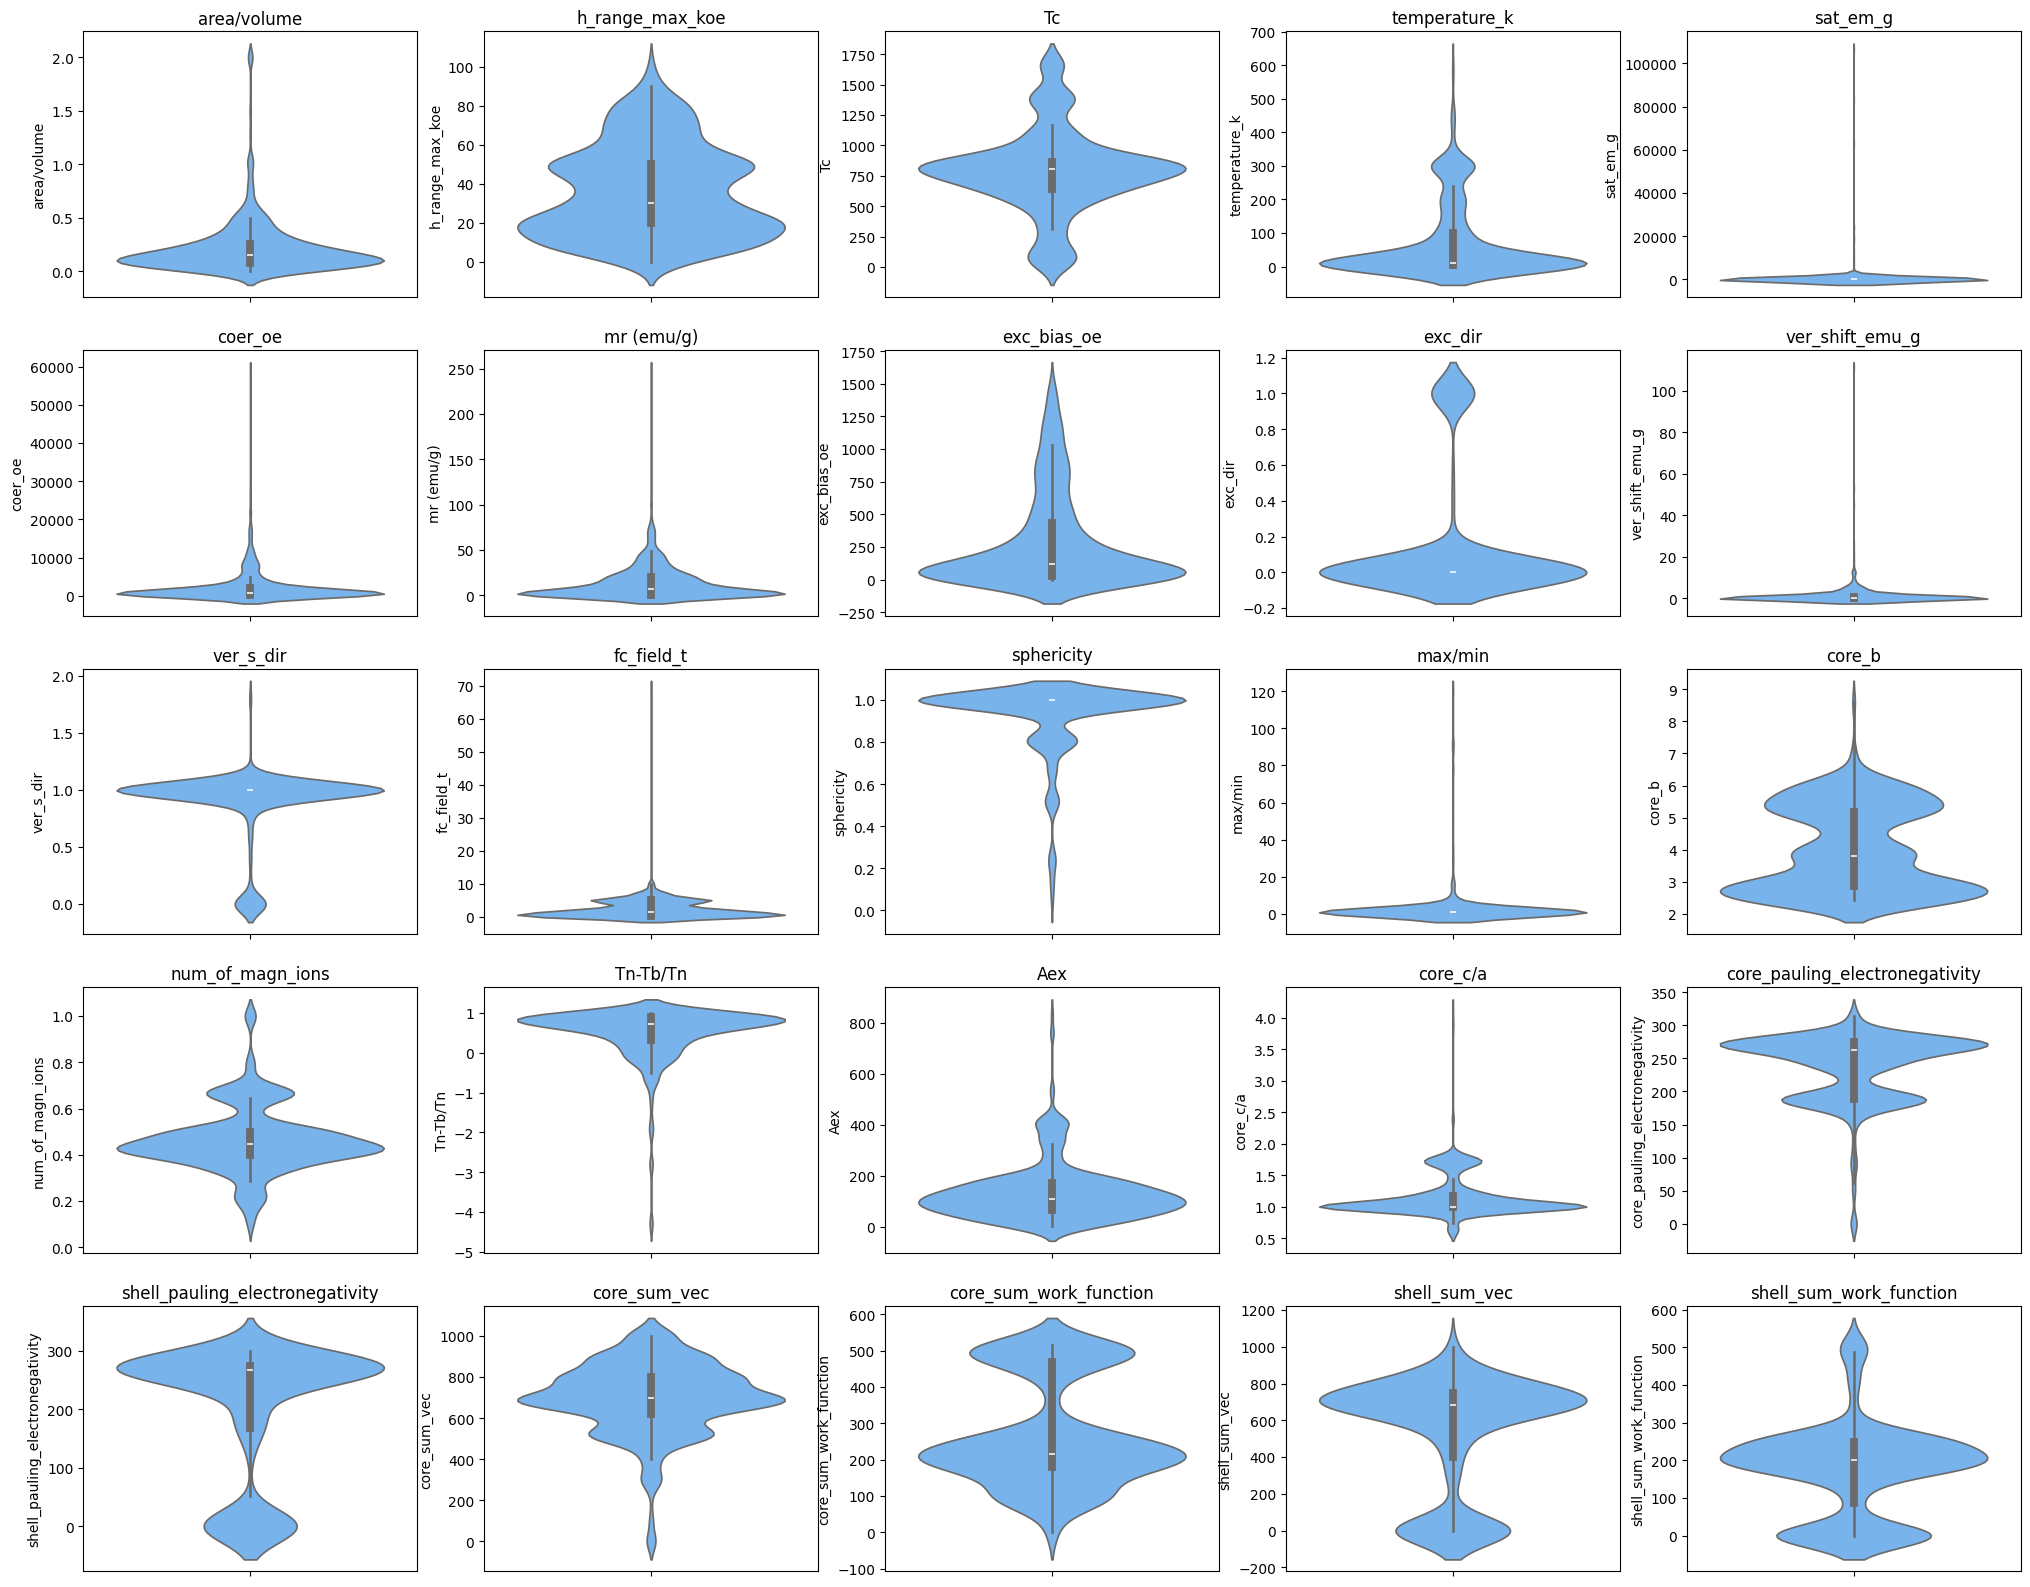

In [ ]:
# Устанавливаем размер графиков
plt.figure(figsize=(25, 20))

# Построение violin plot для каждого числового столбца
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i + 1)
    sns.violinplot(y=df[column], color='#66b3ff')
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Функция для вычисления границ выбросов
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Определение выбросов для каждого столбца
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outlier_bounds = {}

for column in numeric_columns:
    lower_bound, upper_bound = calculate_outliers(df, column)
    outlier_bounds[column] = (lower_bound, upper_bound)
    print(f'{column}: lower_bound = {lower_bound}, upper_bound = {upper_bound}')
    # Замена выбросов модой
    mode_value = df[column].mode()[0]
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mode_value

# Проверка результатов замены выбросов
print(f'Количество строк после замены выбросов: {len(df)}')
print(df.describe())

area/volume: lower_bound = -0.20361145700000005, upper_bound = 0.55853051052
h_range_max_koe: lower_bound = -25.0, upper_bound = 95.0
Tc: lower_bound = 332.00000000000006, upper_bound = 1176.7999999999997
temperature_k: lower_bound = -212.5, upper_bound = 367.5
sat_em_g: lower_bound = -58.55499999999999, upper_bound = 117.69299999999998
coer_oe: lower_bound = -2477.723, upper_bound = 4876.205
mr (emu/g): lower_bound = -27.586749999999995, upper_bound = 47.67205
exc_bias_oe: lower_bound = -440.06899999999996, upper_bound = 752.115
ver_shift_emu_g: lower_bound = -1.0154999999999998, upper_bound = 1.6925
fc_field_t: lower_bound = -5.41, upper_bound = 9.07
core_b: lower_bound = -0.7796483740000002, upper_bound = 9.08873929
core_alpha: lower_bound = 26.248410999999983, upper_bound = 155.92287532
core_beta: lower_bound = 59.55586397499998, upper_bound = 139.413782255
core_gamma: lower_bound = 45.282720899999994, upper_bound = 147.98432042
shell_b: lower_bound = -5.839465977, upper_bound = 11

In [19]:
df = pd.read_csv(r'/content/24bias_all_corr_outliner - 24bias_all_corr_outliner.csv.csv', index_col=0)

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
df.columns

Index(['h_range_max_koe', 'Tc', 'area/volume',
       'core_pauling_electronegativity', 'core_sum_vec', 'Tn-Tb/Tn', 'Aex',
       'sat_em_g', 'mr (emu/g)', 'temperature_k', 'coer_oe', 'exc_bias_oe',
       'exc_dir', 'ver_shift_emu_g', 'ver_s_dir', 'fc_field_t', 'sphericity',
       'max/min', 'core_b', 'num_of_magn_ions', 'core_c/a',
       'core_sum_work_function', 'shell_sum_vec', 'shell_sum_work_function',
       'core_pauling_electronegativity_difference', 'core_vec_difference',
       'shell_pauling_electronegativity', 'core_work_function_difference',
       'shell_pauling_electronegativity_difference', 'shell_vec_difference',
       'shell_work_function_difference'],
      dtype='object')

In [16]:
# Перечень столбцов для преобразования в категориальный тип
categorical_columns = ['max/min', 'exc_dir', 'ver_s_dir', 'sphericity']

# Преобразование указанных столбцов в категориальный тип
df[categorical_columns] = df[categorical_columns].astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 0 to 978
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   h_range_max_koe                             933 non-null    float64
 1   Tc                                          933 non-null    float64
 2   area/volume                                 933 non-null    float64
 3   core_pauling_electronegativity              933 non-null    float64
 4   core_sum_vec                                933 non-null    float64
 5   Tn-Tb/Tn                                    933 non-null    float64
 6   Aex                                         933 non-null    float64
 7   sat_em_g                                    933 non-null    float64
 8   mr (emu/g)                                  933 non-null    float64
 9   temperature_k                               933 non-null    float64
 10  coer_oe            

In [ ]:
#df = df.drop(columns=['core', 'shell', 'formula'])

<ipython-input-22-da7a8cbff6ea>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 3, k)


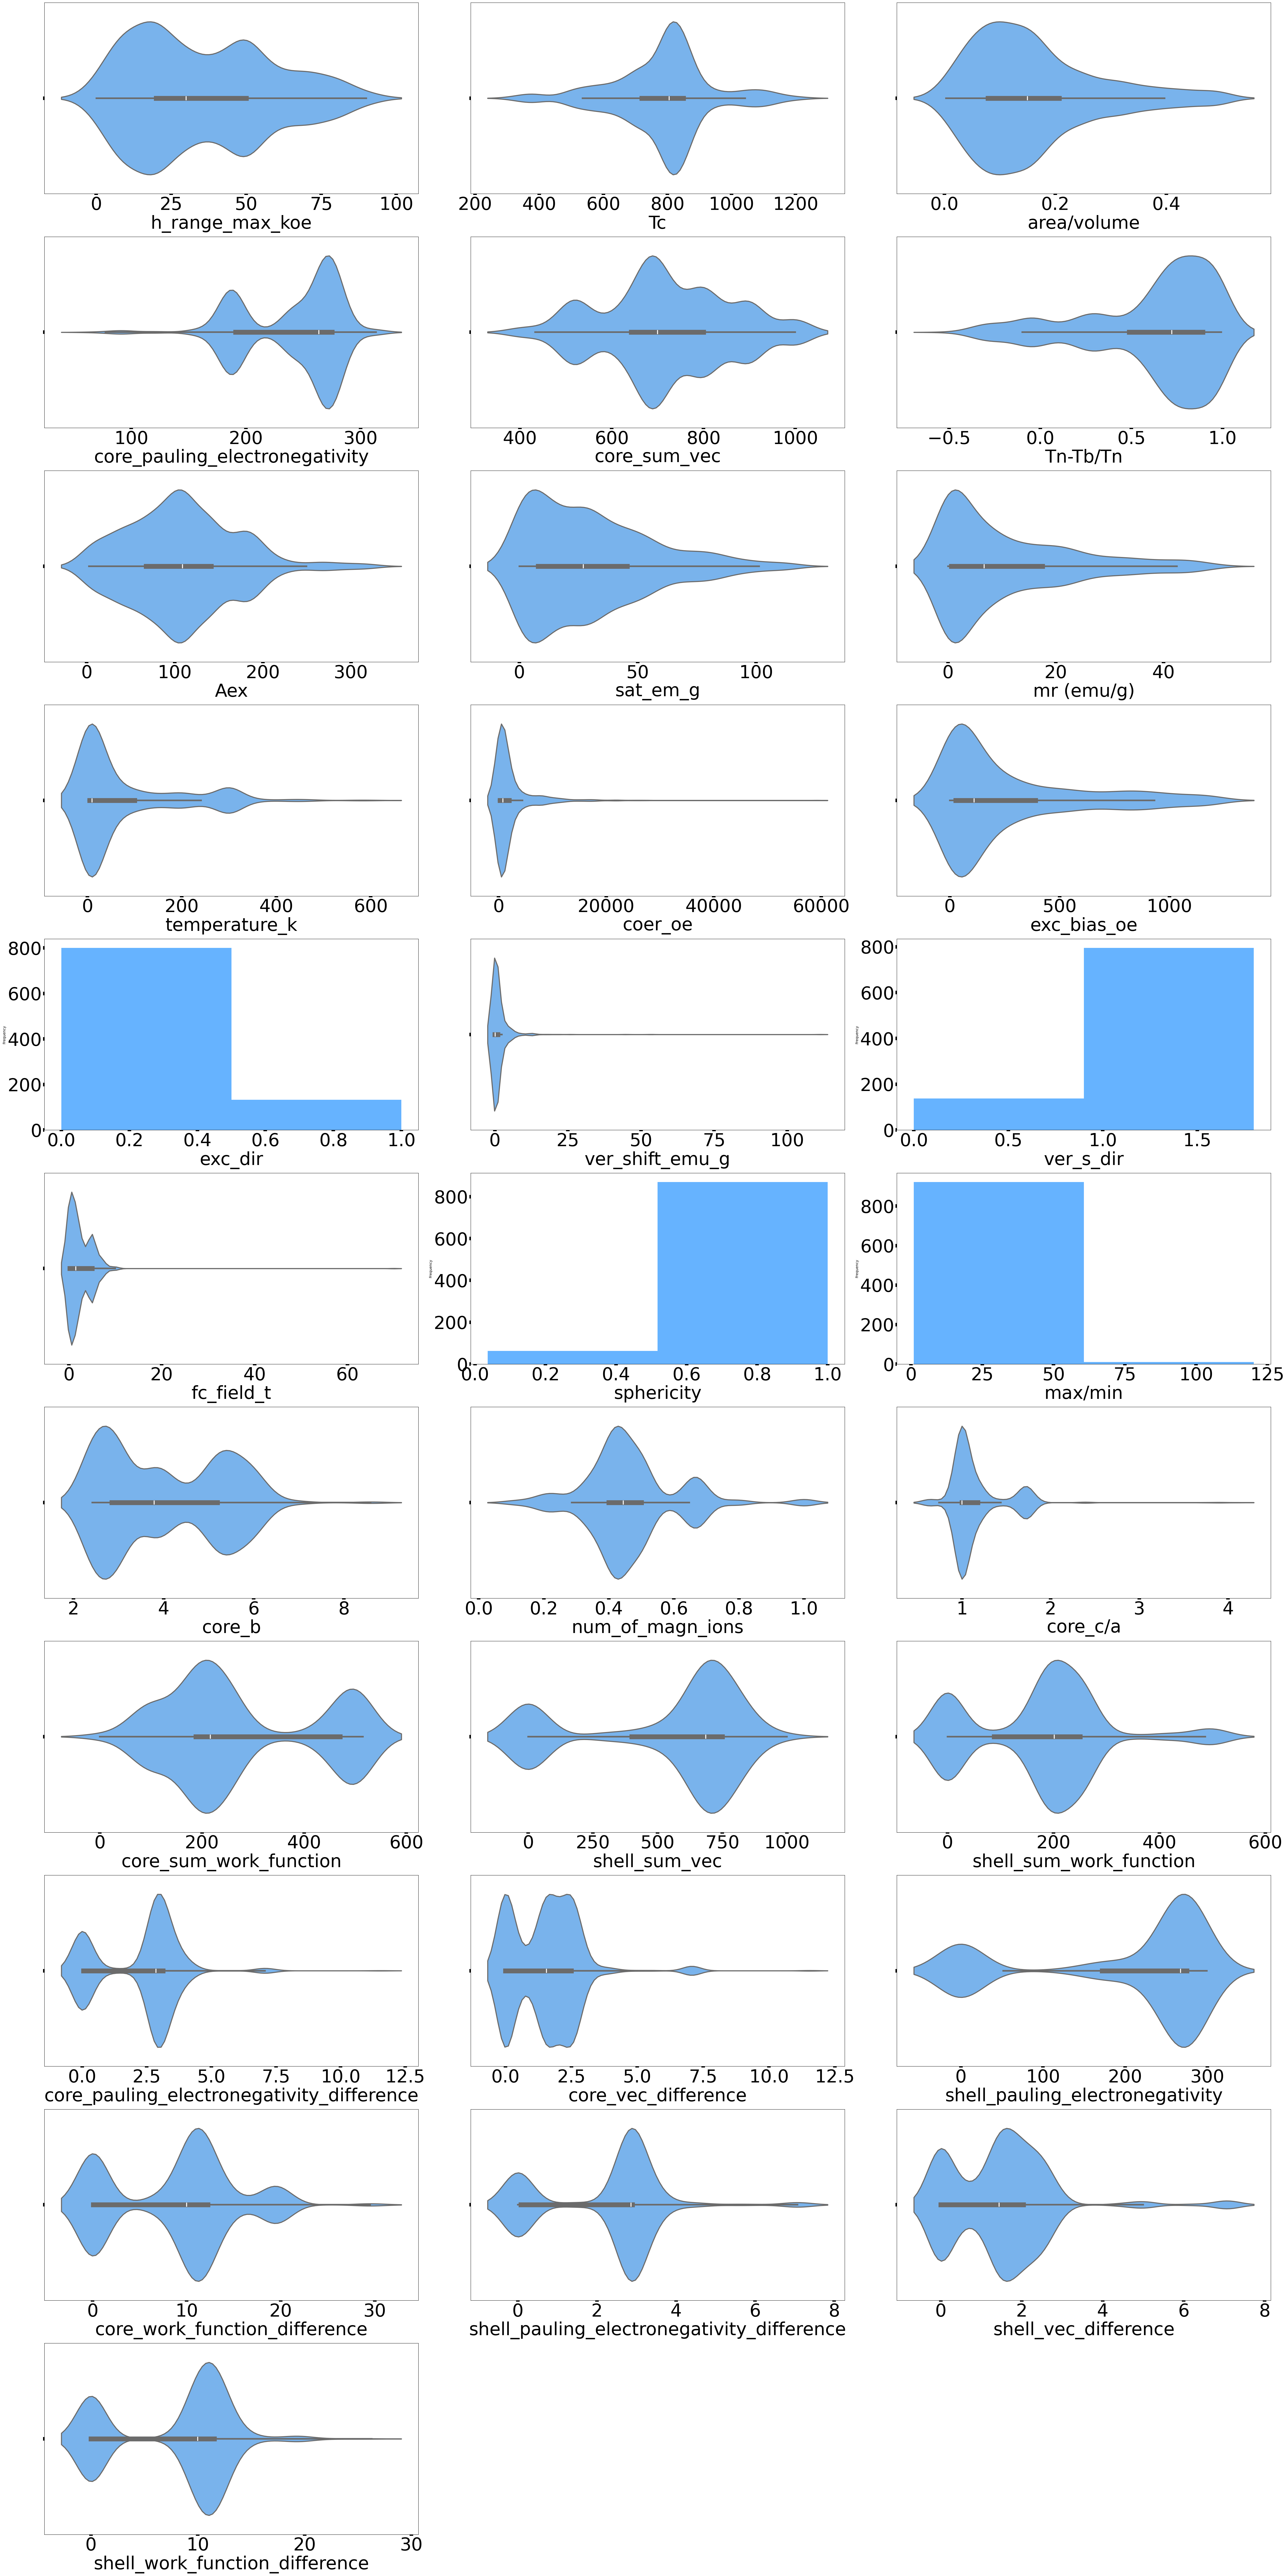

In [22]:
# Задание цветов вручную
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']

k = 1
f, ax = plt.subplots(figsize=(50, 100))
num_columns = len(df.columns)
num_rows = (num_columns // 3) + 1  # Adjust number of rows based on the number of columns

for i in df.columns:
    if i in categorical_columns:  # If our parameter is Max/min(size), then plot a histogram
        plt.subplot(num_rows, 3, k)
        df[i].plot.hist(bins=2, color='#66b3ff', rwidth=3)
        plt.xlabel(f'{i}', fontsize=50, family='sans-serif')
        plt.tick_params(axis='both', labelsize=50, width=10)
    else:  # Otherwise, plot a violin plot
        plt.subplot(num_rows, 3, k)
        sns.violinplot(x=df[i], color='#66b3ff', linewidth=3)  # Adjusted here
        plt.tick_params(axis='both', labelsize=50, width=10)
        plt.xlabel(f'{i}', fontsize=50, family='sans-serif')
    k += 1

plt.tight_layout()
plt.show()

<ipython-input-64-da7a8cbff6ea>:16: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



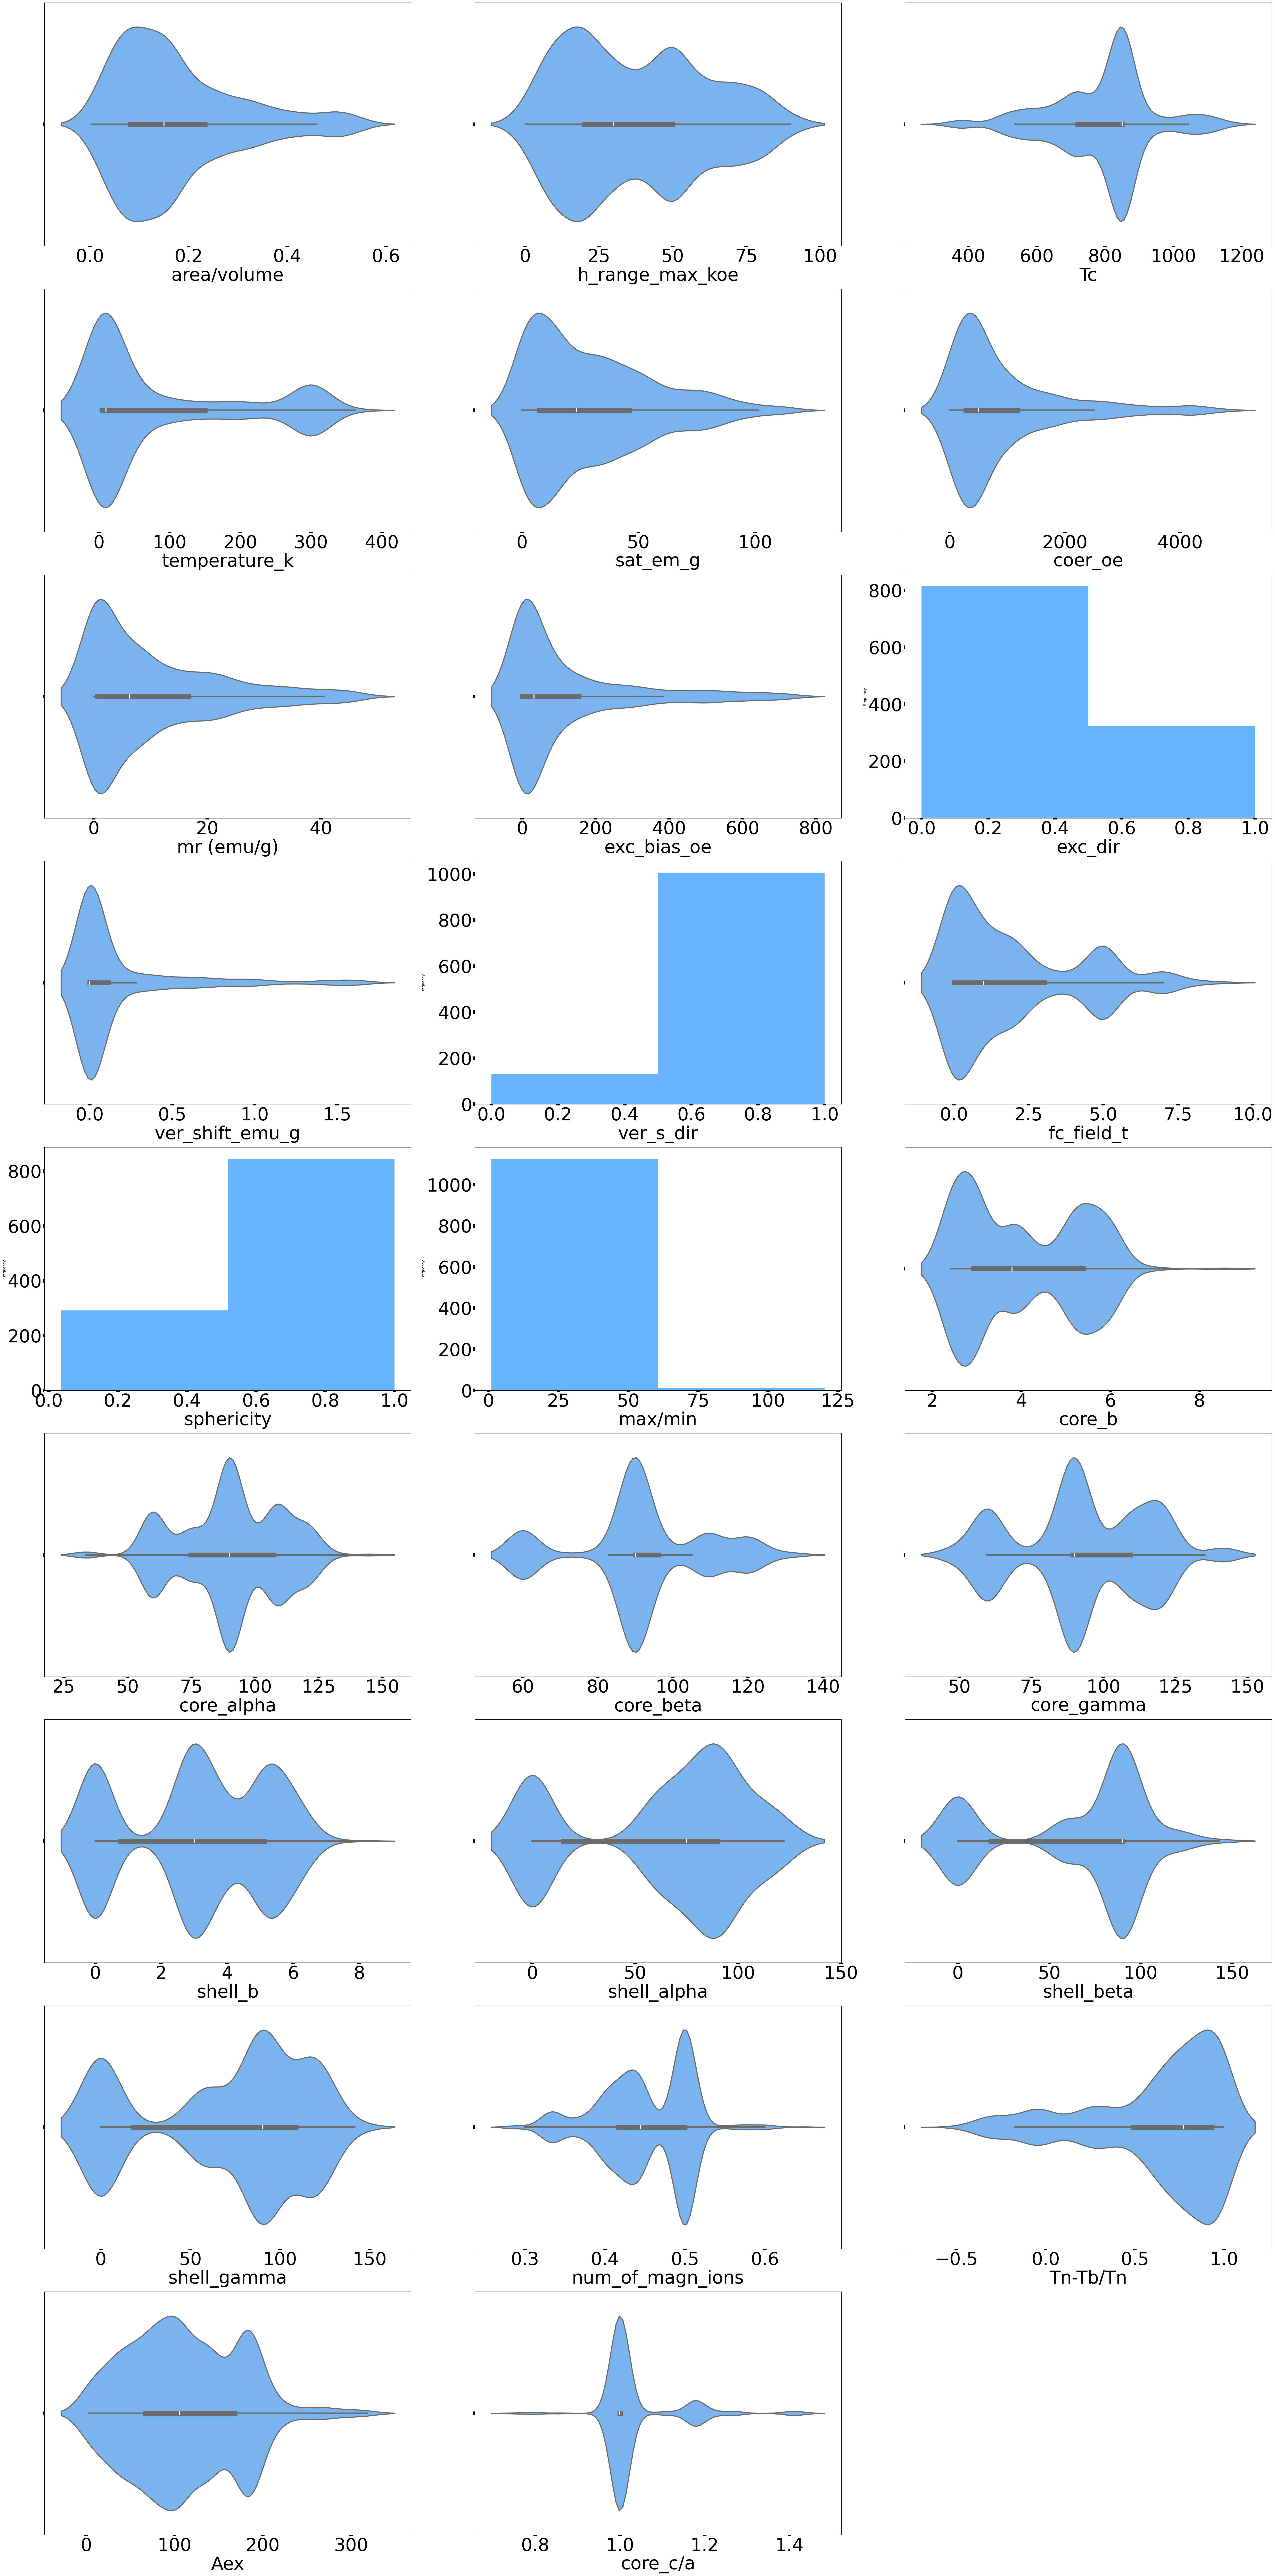

In [ ]:
# Задание цветов вручную
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']

k = 1
f, ax = plt.subplots(figsize=(50, 100))
num_columns = len(df.columns)
num_rows = (num_columns // 3) + 1  # Adjust number of rows based on the number of columns

for i in df.columns:
    if i in categorical_columns:  # If our parameter is Max/min(size), then plot a histogram
        plt.subplot(num_rows, 3, k)
        df[i].plot.hist(bins=2, color='#66b3ff', rwidth=3)
        plt.xlabel(f'{i}', fontsize=50, family='sans-serif')
        plt.tick_params(axis='both', labelsize=50, width=10)
    else:  # Otherwise, plot a violin plot
        plt.subplot(num_rows, 3, k)
        sns.violinplot(x=df[i], color='#66b3ff', linewidth=3)  # Adjusted here
        plt.tick_params(axis='both', labelsize=50, width=10)
        plt.xlabel(f'{i}', fontsize=50, family='sans-serif')
    k += 1

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137 entries, 0 to 1297
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area/volume       1137 non-null   float64
 1   h_range_max_koe   1137 non-null   float64
 2   Tc                1137 non-null   float64
 3   temperature_k     1137 non-null   float64
 4   sat_em_g          1137 non-null   float64
 5   coer_oe           1137 non-null   float64
 6   mr (emu/g)        1137 non-null   float64
 7   exc_bias_oe       1137 non-null   float64
 8   exc_dir           1137 non-null   float64
 9   ver_shift_emu_g   1137 non-null   float64
 10  ver_s_dir         1137 non-null   float64
 11  fc_field_t        1137 non-null   float64
 12  sphericity        1137 non-null   float64
 13  max/min           1137 non-null   float64
 14  core_b            1137 non-null   float64
 15  core_alpha        1137 non-null   float64
 16  core_beta         1137 non-null   float64
 17  

In [ ]:
df = df.to_csv('1_bias_all_corr_outliner.csv')